In [89]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [108]:
df_result = pd.read_csv('result(1).txt', header=None, names=['pid', "r-precision"])

In [91]:
df = pd.read_csv('data_withmeta/combined_data_withmeta.csv')

In [92]:
# characteristics of playlists
# characteristics of songs

In [109]:
playlist_with_0 = df[df['playlist_pid'].isin(list(df_result[df_result['r-precision'] == 0].pid))]

In [110]:
len(df_result[df_result['r-precision'] == 0].pid)

721

In [111]:
playlist_withnot_0 = df[df['playlist_pid'].isin(list(df_result[df_result['r-precision'] != 0].pid))]

In [112]:
len(df_result[df_result['r-precision'] != 0].pid)

1067

In [113]:
len(set(playlist_withnot_0.track_uri.unique()).intersection(set(playlist_with_0.track_uri.unique())))

8349

In [114]:
playlist_with_0['results'] = 0

/tmp/ipykernel_5635/4171503831.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playlist_with_0['results'] = 0


In [115]:
playlist_withnot_0['results'] = 1

/tmp/ipykernel_5635/4215576339.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playlist_withnot_0['results'] = 1


In [116]:
df_test = pd.concat([playlist_with_0,playlist_withnot_0])

In [117]:
plot_features_track = ['danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature']

In [118]:
plot_features_playlist = ['num_tracks', 'num_albums',
       'num_followers', 'num_edits', 'duration_ms_playlist', 'num_artists']

In [119]:
df_track_plot = df_test.drop_duplicates(subset=['track_uri'])
df_playlist_plot = df_test.drop_duplicates(subset=['playlist_pid'])

In [123]:
def plot_feature (df,lst):
    sns.set()
    fig, axes = plt.subplots(len(plot_features), 1)
    for i in range(len(lst)):
        sns.displot(df, x=lst[i], hue='results', kind="kde", fill=True, ax=axes[i])

/home/phu/anaconda3/envs/cmpe258/lib/python3.9/site-packages/seaborn/distributions.py:2148: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
/home/phu/anaconda3/envs/cmpe258/lib/python3.9/site-packages/seaborn/distributions.py:2148: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
/home/phu/anaconda3/envs/cmpe258/lib/python3.9/site-packages/seaborn/distributions.py:2148: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
/home/phu/anaconda3/envs/cmpe258/lib/python3.9/site-packages/seaborn/distributions.py:2148: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
/home/phu/anaconda3/

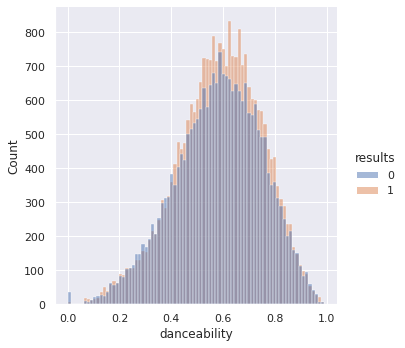

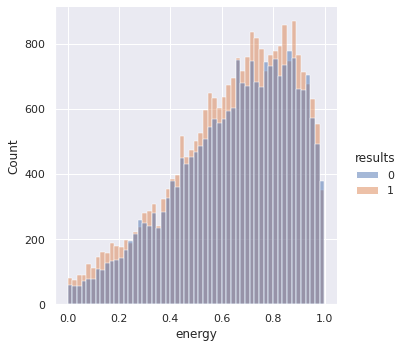

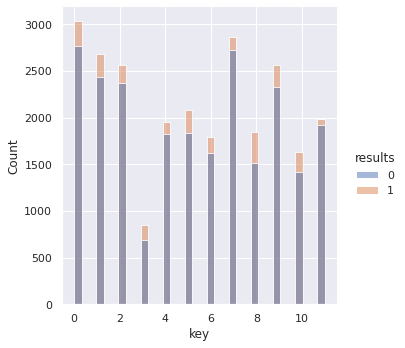

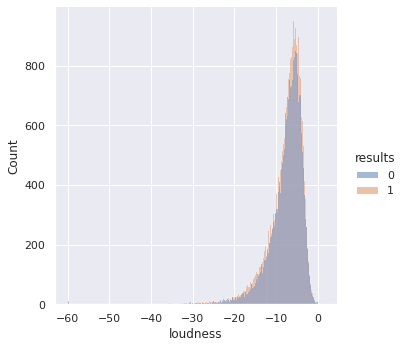

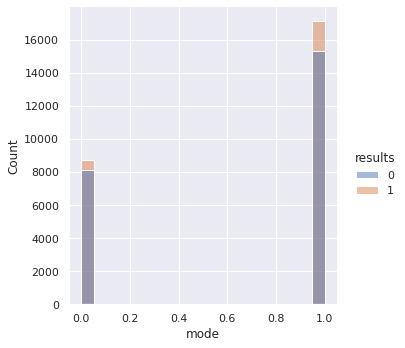

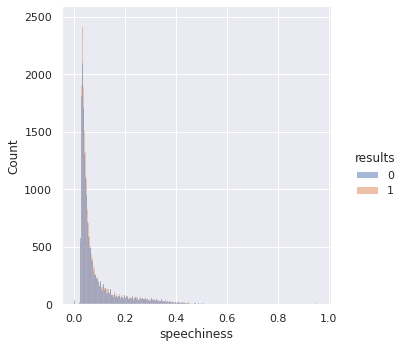

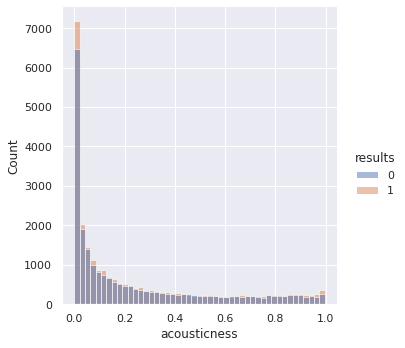

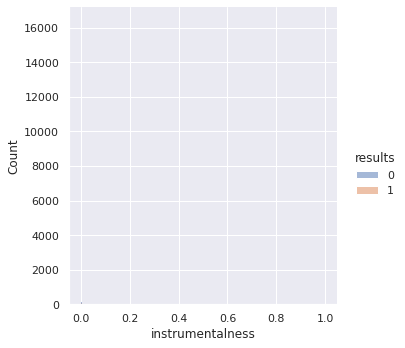

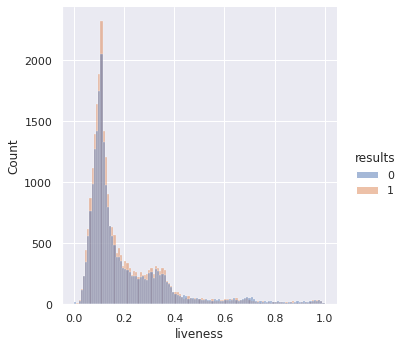

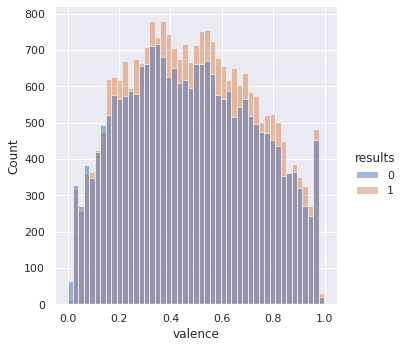

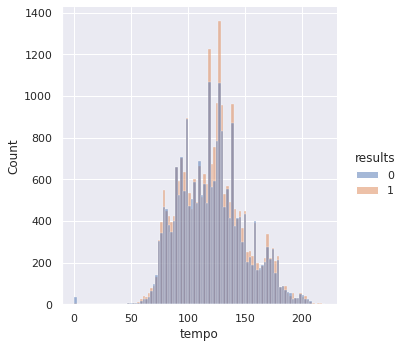

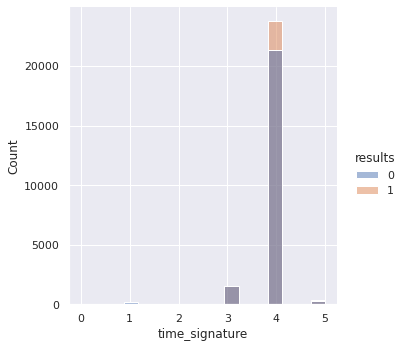

In [125]:
plot_feature(df_track_plot, plot_features_track)

/home/phu/anaconda3/envs/cmpe258/lib/python3.9/site-packages/seaborn/distributions.py:2148: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
/home/phu/anaconda3/envs/cmpe258/lib/python3.9/site-packages/seaborn/distributions.py:2148: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
/home/phu/anaconda3/envs/cmpe258/lib/python3.9/site-packages/seaborn/distributions.py:2148: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
/home/phu/anaconda3/envs/cmpe258/lib/python3.9/site-packages/seaborn/distributions.py:2148: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
/home/phu/anaconda3/

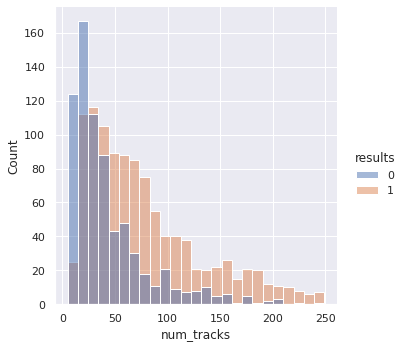

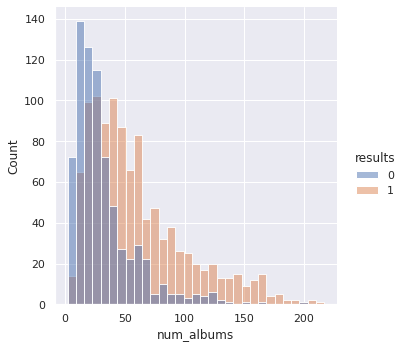

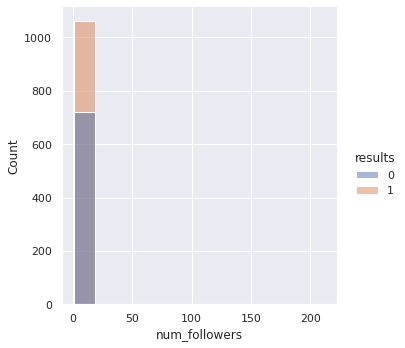

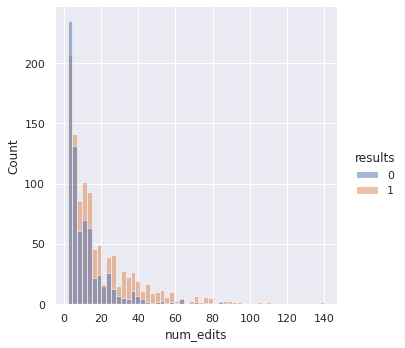

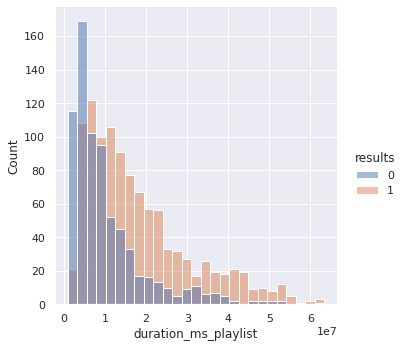

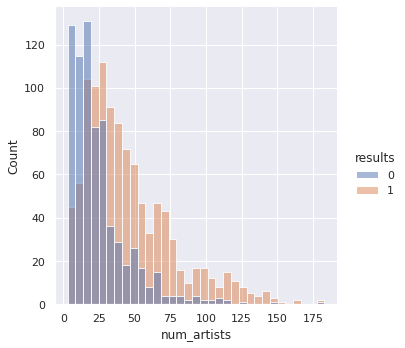

In [124]:
plot_feature(df_playlist_plot, plot_features_playlist)

In [ ]:
# playlist that has prediction is more diversed, tend to have a lot more tracks
# doesnt look like vibe distribution affect the decision making process
# maybe I should includes number of artists and duration playlist in to account